## Músicas mais Tocadas no Spotify 2023 🎶

### Importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

### Leitura do arquivo csv

In [3]:
df = pd.read_csv('C:/Users/bia_c/OneDrive/Área de Trabalho/projeto_final_modulo_IV/spotify-2023.csv', encoding='latin-1')

In [4]:
df.head() # mostra as primeiras linhas do DataFrame

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df.info() # mostra informações importantes do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Limpeza dos dados

In [6]:
# Checar se há valores nulos na tabela 
missing_values = df.isnull().sum()

print("Valores nulos:")
print(missing_values)


Valores nulos:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [7]:
# Deletar colunas que possuem valores nulos ou que não serão utilizadas na análise

columns_to_delete = ['in_shazam_charts', 'key', 'mode']
df = df.drop(columns=columns_to_delete, axis=1)


In [8]:
#Verificar se há dados duplicados

columns_to_check_duplicates = ['track_name', 'artist(s)_name', 'released_year']

# Verificar duplicatas com base nessas colunas
duplicates = df.duplicated(subset=columns_to_check_duplicates, keep=False)

# Exibir as linhas duplicadas
duplicated_songs = df[duplicates].sort_values(by=columns_to_check_duplicates)

# Se houver músicas duplicadas, você verá essas linhas
duplicated_songs[['track_name', 'artist(s)_name', 'released_year']]

,track_name,artist(s)_name,released_year
372,About Damn Time,Lizzo,2022
764,About Damn Time,Lizzo,2022
178,SNAP,Rosa Linn,2022
873,SNAP,Rosa Linn,2022
345,SPIT IN MY FACE!,ThxSoMch,2022
482,SPIT IN MY FACE!,ThxSoMch,2022
512,Take My Breath,The Weeknd,2021
616,Take My Breath,The Weeknd,2021


In [9]:
# Deletar os dados duplicados deixando somente um deles
df = df.drop_duplicates(subset=columns_to_check_duplicates, keep='first')

In [10]:
# Converter a coluna 'streams' para o tipo numérico
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Identificar linhas onde 'streams' não é um número
non_numeric_streams = df[np.isnan(df['streams'])]

# Exibir a música em que 'stream' não é um número
non_numeric_streams[['track_name', 'artist(s)_name', 'streams']]

,track_name,artist(s)_name,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,NaN


In [11]:
# Excluir música com valor nulo de 'streams' pelo index

# Nome da música a ser excluída
song_name_to_delete = 'Love Grows (Where My Rosemary Goes)'

# Encontrar o índice da música a ser excluída
index_to_delete = df[df['track_name'] == song_name_to_delete].index

# Verificar se o nome da música está presente antes de tentar excluir
if not index_to_delete.empty:
    # Excluir a linha correspondente ao índice encontrado usando o método drop
    df = df.drop(index_to_delete)
else:
    print(f'A música com o nome "{song_name_to_delete}" não foi encontrada no DataFrame.')

In [12]:
# Converter a coluna 'in_deezer_playlists' para o tipo numérico
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

# Identificar linhas onde 'streams' não é um número
non_numeric_in_deezer = df[np.isnan(df['in_deezer_playlists'])]

# Exibir a música em que 'in_deezer_playlists' não é um número
non_numeric_in_deezer[['track_name', 'artist(s)_name', 'in_deezer_playlists']]


,track_name,artist(s)_name,in_deezer_playlists
48,Starboy,"The Weeknd, Daft Punk",NaN
54,Another Love,Tom Odell,NaN
55,Blinding Lights,The Weeknd,NaN
65,Yellow,Chris Molitor,NaN
73,Sweater Weather,The Neighbourhood,NaN
...,...,...,...
761,Photograph,Ed Sheeran,NaN
762,Love Yourself,Justin Bieber,NaN
871,Sweet Child O' Mine,Guns N' Roses,NaN
893,Heartless,Kanye West,NaN


In [13]:
# Configurar opções de exibição para evitar notação científica
pd.set_option('float_format', '{:.2f}'.format)

# Converter a coluna 'streams' para valores numéricos, tratando erros
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Mudar para valores do tipo float 
df['streams'] = df['streams'].astype(float)

# Substituir valores negativos por seus equivalentes em valor absoluto
df['streams'] = df['streams'].abs()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            948 non-null    object 
 1   artist(s)_name        948 non-null    object 
 2   artist_count          948 non-null    int64  
 3   released_year         948 non-null    int64  
 4   released_month        948 non-null    int64  
 5   released_day          948 non-null    int64  
 6   in_spotify_playlists  948 non-null    int64  
 7   in_spotify_charts     948 non-null    int64  
 8   streams               948 non-null    float64
 9   in_apple_playlists    948 non-null    int64  
 10  in_apple_charts       948 non-null    int64  
 11  in_deezer_playlists   869 non-null    float64
 12  in_deezer_charts      948 non-null    int64  
 13  bpm                   948 non-null    int64  
 14  danceability_%        948 non-null    int64  
 15  valence_%             948 no

## Análise de Dados


### Popularidade das músicas

In [15]:
# Obter informações das 5 músicas mais escutadas de acordo com a coluna 'stream'
most_listening = df.sort_values(by='streams', ascending=False).head()
most_listening = pd.DataFrame(most_listening[['track_name', 'artist(s)_name', 'streams']])
most_listening

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074.00
179,Shape of You,Ed Sheeran,3562543890.00
86,Someone You Loved,Lewis Capaldi,2887241814.00
620,Dance Monkey,Tones and I,2864791672.00
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550.00


C:\Users\bia_c\AppData\Local\Temp\ipykernel_10652\51692786.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='track_artist', data=most_listening, palette='viridis')


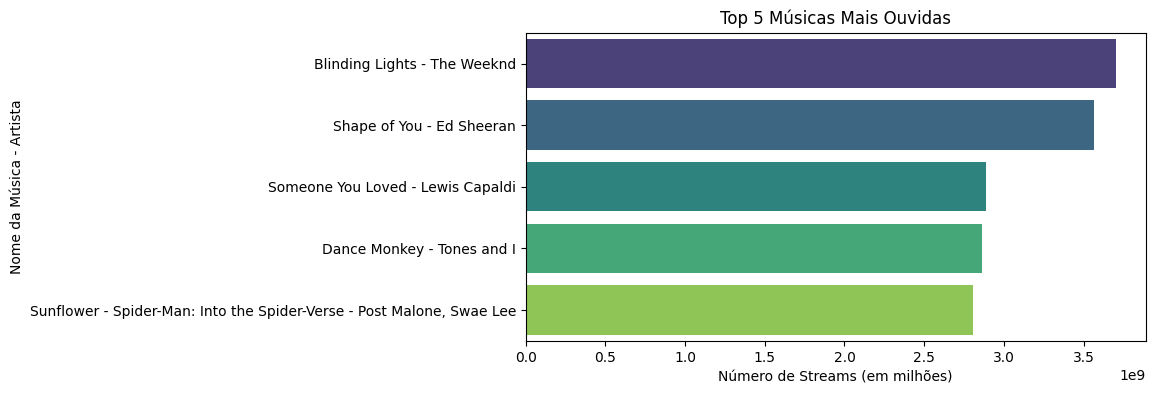

In [16]:
# Criando um gráfico de barras 
plt.figure(figsize=(8, 4))  

# Concatenando o nome da música e do artista
most_listening['track_artist'] = most_listening['track_name'] + ' - ' + most_listening['artist(s)_name']

# Plotando o gráfico de barras
sns.barplot(x='streams', y='track_artist', data=most_listening, palette='viridis')

plt.xlabel('Número de Streams (em milhões)')
plt.ylabel('Nome da Música - Artista')
plt.title('Top 5 Músicas Mais Ouvidas')
plt.show()

### Popularidade dos Artistas

In [17]:
# Agrupar por artistas e calcular o total de streams
# Top 5 artistas mais tocados
top_artists = df.groupby('artist(s)_name')['streams'].sum().reset_index()

top_artists = top_artists.sort_values(by='streams', ascending=False).head()
top_artists[['artist(s)_name', 'streams']]



,artist(s)_name,streams
557,Taylor Swift,14053658300.00
159,Ed Sheeran,13908947204.00
571,The Weeknd,13752850536.00
222,Harry Styles,11608645649.00
43,Bad Bunny,9997799607.00


In [18]:
# Artistas mais presentes nas playlists do Spotify
top_spotify_artists = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False).head()
top_spotify_artists = pd.DataFrame({'artist(s)_name': top_spotify_artists.index, 'in_spotify_playlists': top_spotify_artists.values})
top_spotify_artists

,artist(s)_name,in_spotify_playlists
0,The Weeknd,137661
1,Taylor Swift,132974
2,Ed Sheeran,128758
3,Harry Styles,110026
4,Eminem,87331


In [19]:
# Artistas mais presentes nas playlists do Deezer
from unidecode import unidecode
top_deezer_artists = df.groupby('artist(s)_name')['in_deezer_playlists'].sum().sort_values(ascending=False).head()
top_deezer_artists = pd.DataFrame({'artist(s)_name': top_deezer_artists.index, 'in_deezer_playlists': top_deezer_artists.values})
top_deezer_artists


,artist(s)_name,in_deezer_playlists
0,Harry Styles,2483.00
1,Bruno Mars,2024.00
2,Mï¿½ï¿½ne,1899.00
3,The Weeknd,1794.00
4,Taylor Swift,1708.00


In [20]:
# Artistas mais presentes nas playlists da Apple Music
top_apple_artists = df.groupby('artist(s)_name')['in_apple_playlists'].sum().sort_values(ascending=False).head()
top_apple_artists = pd.DataFrame({'artist(s)_name': top_apple_artists.index, 'in_apple_playlists': top_apple_artists.values})
top_apple_artists


,artist(s)_name,in_apple_playlists
0,Taylor Swift,1796
1,Harry Styles,1741
2,The Weeknd,1503
3,Ed Sheeran,1448
4,Dua Lipa,765


C:\Users\bia_c\AppData\Local\Temp\ipykernel_10652\3059147664.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='in_apple_playlists', y='artist(s)_name', data=top_apple_artists, ax=axes[0, 1], palette='inferno')
C:\Users\bia_c\AppData\Local\Temp\ipykernel_10652\3059147664.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='in_deezer_playlists', y='artist(s)_name', data=top_deezer_artists, ax=axes[1, 0], palette='plasma')
C:\Users\bia_c\AppData\Local\Temp\ipykernel_10652\3059147664.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

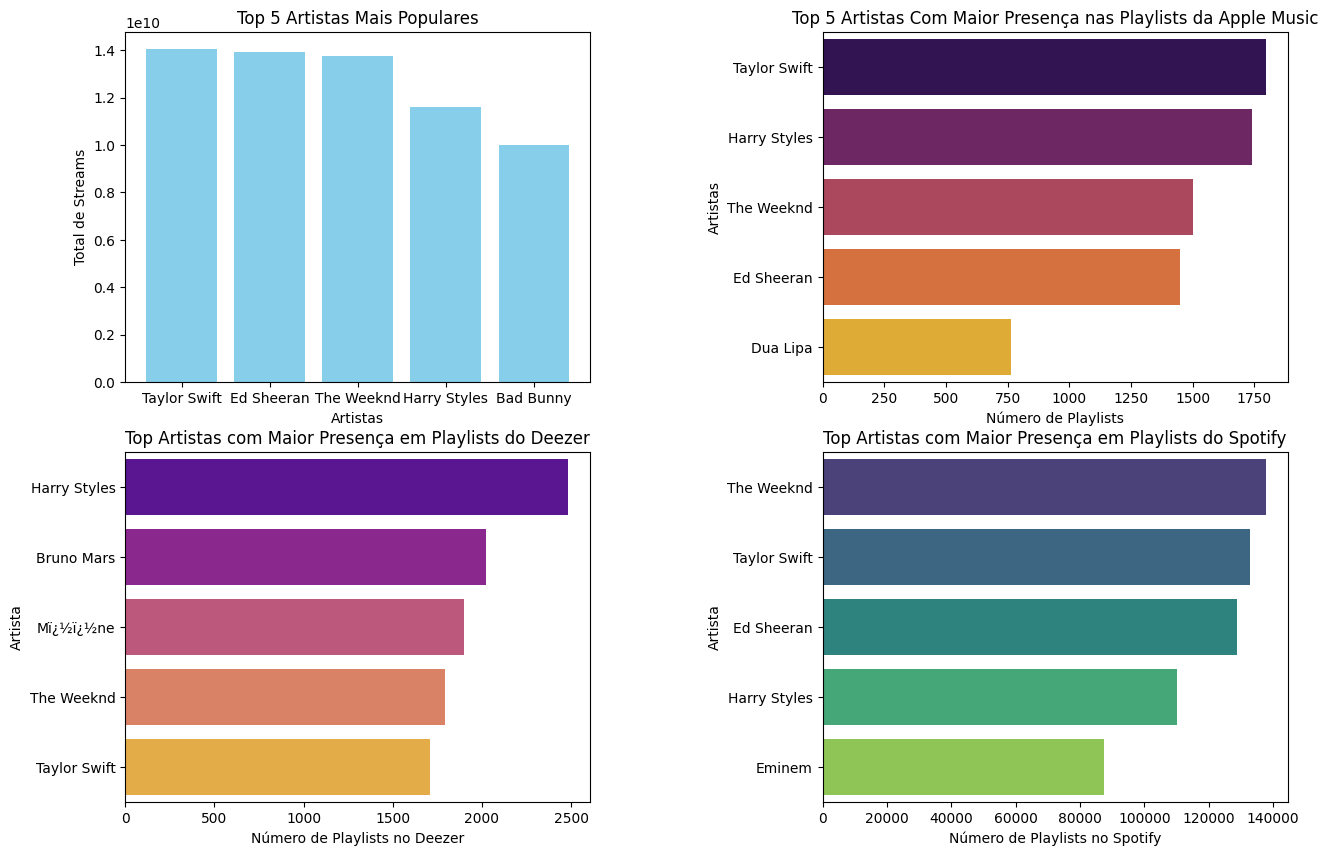

In [21]:
# Configurar subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5)  # Ajusta o espaço entre os subplots

top_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(5)

# Gráfico Top 5 artistas mais populares
axes[0, 0].bar(top_artists.index, top_artists.values, color='skyblue')
axes[0, 0].set_title('Top 5 Artistas Mais Populares')
axes[0, 0].set_xlabel('Artistas')
axes[0, 0].set_ylabel('Total de Streams')

# Gráfico Top 5 artistas mais populares nas playlists da Apple Music
sns.barplot(x='in_apple_playlists', y='artist(s)_name', data=top_apple_artists, ax=axes[0, 1], palette='inferno')
axes[0, 1].set_title('Top 5 Artistas Com Maior Presença nas Playlists da Apple Music')
axes[0, 1].set_ylabel('Artistas')
axes[0, 1].set_xlabel('Número de Playlists')

# Gráfico Top 5 artistas mais populares nas playlists da Deezer
sns.barplot(x='in_deezer_playlists', y='artist(s)_name', data=top_deezer_artists, ax=axes[1, 0], palette='plasma')
axes[1, 0].set_xlabel('Número de Playlists no Deezer')
axes[1, 0].set_ylabel('Artista')
axes[1, 0].set_title('Top Artistas com Maior Presença em Playlists do Deezer')

# Gráfico Top 5 artistas mais populares nas playlists do Spotify
sns.barplot(x='in_spotify_playlists', y='artist(s)_name', data=top_spotify_artists, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_xlabel('Número de Playlists no Spotify')
axes[1, 1].set_ylabel('Artista')
axes[1, 1].set_title('Top Artistas com Maior Presença em Playlists do Spotify')

# Exibir os subplots
plt.show()

### Distribuição de streaming 

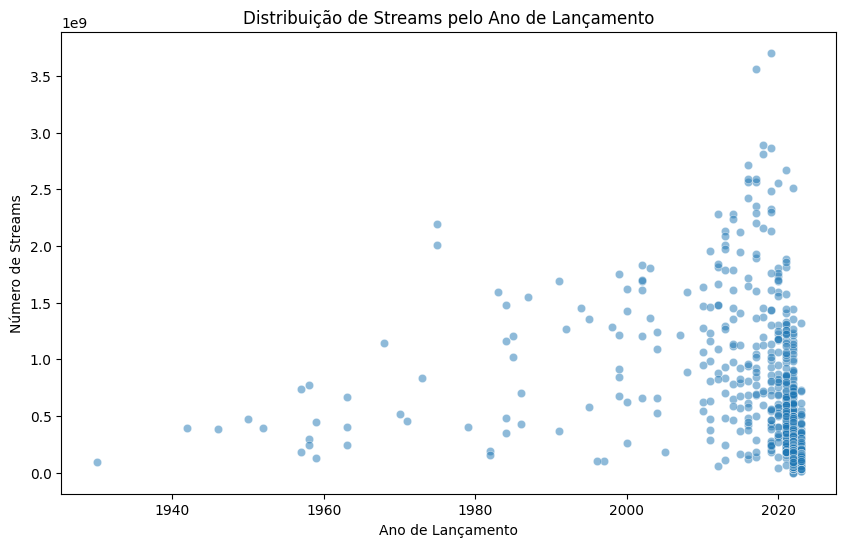

In [22]:
# Criar um gráfico de dispersão entre a distribuição de streams pelo ano de lançamento das músicas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='released_year', y='streams', data=df, alpha=0.5)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Streams')
plt.title('Distribuição de Streams pelo Ano de Lançamento')

plt.show()
